# linear regression
线性回归的简单实现，包括一个输入的线性回归和多个输入的多元回归，实现方式为python的numpy库。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import random
%matplotlib notebook

## 输入属性个数只有一个
利用均方误差最小化作为模型求解的方法。 同时，这也即最小二乘法。


In [3]:
np.random.seed(1)

In [5]:
aa = random.randn(10)

In [6]:
aa

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038])

In [11]:
x = np.linspace(1,10,num=10)

In [22]:
y = x + 0.5*aa

In [23]:
y

array([ 1.81217268,  1.69412179,  2.73591412,  3.46351569,  5.43270381,
        4.84923065,  7.87240588,  7.61939655,  9.15951955,  9.87531481])

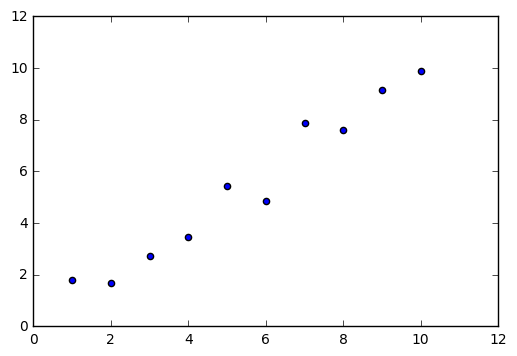

In [24]:
plt.scatter(x,y)

In [27]:
x.shape[0]

10L

$$ \Large w = \frac {\sum\limits_{i=1}^{m}y_i(x_i-\bar x)}{\sum\limits_{i=1}^mx_i^2-\frac{1}{m}(\sum\limits_{i=1}^{m}x_i)^2} ,$$

$$ \Large b = \frac{1}{m}\sum\limits_{i=1}^m(y_i-wx_i) $$

In [28]:
w = (y*(x-x.mean())).sum()*1.0/((x*x).sum() - (x.sum())**2 * 1.0/x.shape[0])

In [30]:
b = (y - w*x).sum()*1.0/x.shape[0]

In [31]:
print "w=",w
print "b=",b

w= 0.981131351532
b= 0.055207121173


In [32]:
x2 = np.linspace(1,10,100)

In [33]:
y2 = w*x2 + b

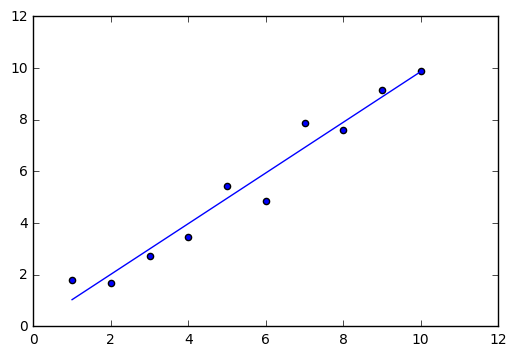

In [35]:
plt.scatter(x,y)
plt.plot(x2,y2)

## 多元线性回归(multivariate linear regression)
样本由d个属性描述，同样地，利用最小二乘法对***w***和*b*进行估计。  
$$
f(\textbf{x}_i)=\textbf{w}^T\textbf{x}_i+b,make\quad f(\textbf{x}_i)\simeq y_i
$$

当$\textbf{X}^T\textbf{X}$为满秩矩阵（full-rank matrix）或正定矩阵（positive definite matrix）时，有：  
$$
\overset{\frown}{w}^* = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^Ty
$$

In [140]:
x1 = x2 = np.linspace(1,10,100).reshape(100,1)

In [141]:
x.shape

(100L, 2L)

In [142]:
bias = random.randn(100,1)

In [143]:
bias1 = random.randn(100,1)
bias2 = random.randn(100,1)

In [144]:
x1 = x1 - 0.1*bias1

In [145]:
x2 = x2 - 0.1*bias2

In [146]:
actual_x = np.concatenate((x1,x2),axis=1)

In [147]:
actual_w = np.ones((2,1))

In [148]:
y = actual_x.dot(actual_w)+0.5*bias

<IPython.core.display.Javascript object>


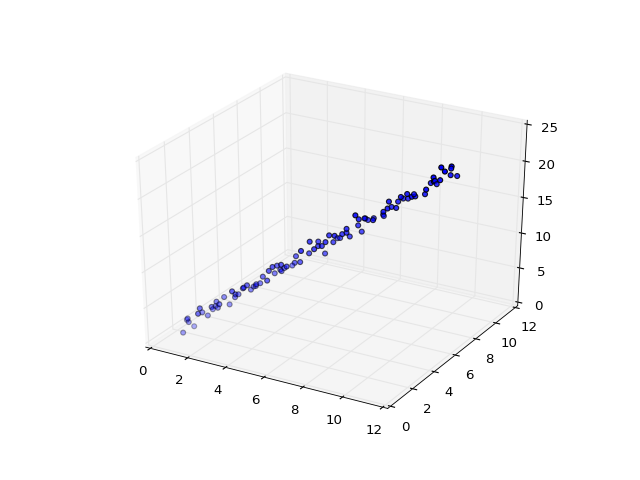

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(x1,x2,y)
plt.show()

In [155]:
x = np.concatenate((actual_x,np.ones((100,1))),axis = 1)

In [157]:
x[:5]

array([[ 1.10710081,  0.80364731,  1.        ],
       [ 1.04357818,  1.24544167,  1.        ],
       [ 1.18441277,  1.17862482,  1.        ],
       [ 1.13549687,  1.17611184,  1.        ],
       [ 1.3824916 ,  1.30920545,  1.        ]])

In [158]:
w = (np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y))

In [159]:
print w

[[ 0.80278183]
 [ 1.16711374]
 [ 0.22234088]]


In [177]:
pred_y = x.dot(w)

均方误差

In [184]:
((pred_y-y)**2).sum()

30.567892522259886